In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

In [58]:
#read the UsArrests.csv
data=pd.read_csv('UsArrests.csv')
data = data.set_index('City')
data.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
#From the info, we can see there is no null values in any columns and the data types are floats and integers
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [26]:
#Getting more ideas about the data, such as mean, standard deviation of each columns
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [27]:
#make the data types to float for all columns
data.Assault=data.Assault.astype('float64')
data.UrbanPop=data.UrbanPop.astype('float64')
data.dtypes

Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

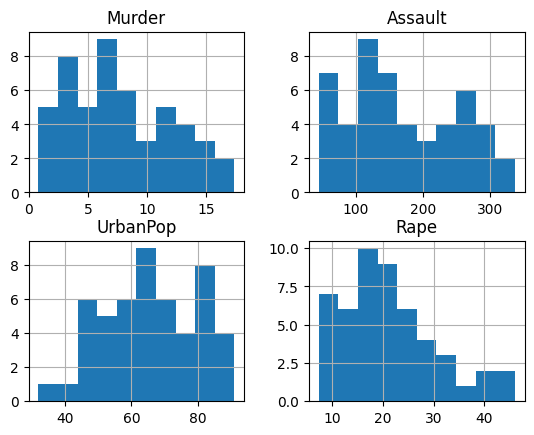

In [28]:
#get some ideas of the distributions of each features
data.hist()

C:\Users\wongh\AppData\Local\Temp\ipykernel_8640\2255487885.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)


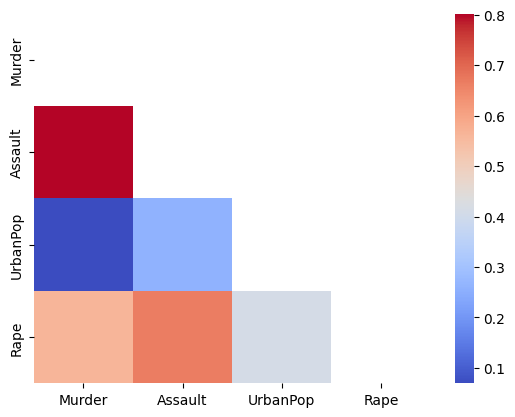

In [59]:
#make the heatmap for visualise the correlation between each features
corr=data.corr()
fig, ax = plt.subplots()
mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)
ax = sns.heatmap(corr,cmap='coolwarm',mask=mask_ut)

In [36]:
#standardise the data
scaled = StandardScaler().fit_transform(data.values)
df=pd.DataFrame(scaled,columns=data.columns)
df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [48]:
#fit the data into PCA
pca=PCA().fit(df)
pca.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0.5, 0, 'principle component')

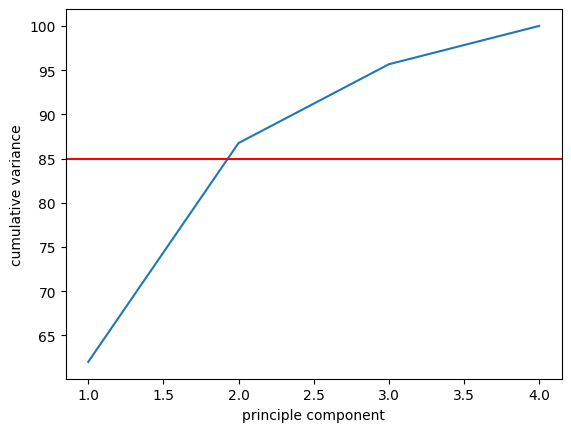

In [51]:
#Generate the line plot to show number of PCs vs the cummulative varioance
#From the graph below, more than 85% of varioance can be explained by 2 principle components
X=np.arange(1,5,step=1)
sns.lineplot(x=X,y=np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(y=85,color='r')
plt.ylabel('cumulative variance')
plt.xlabel('principle component')

In [52]:
#Fit the scaled data into the PCA with 2 PCs
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled)
pca_df = pd.DataFrame(principal_components, index=data.index)
pca_df.head()

,0,1
City,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


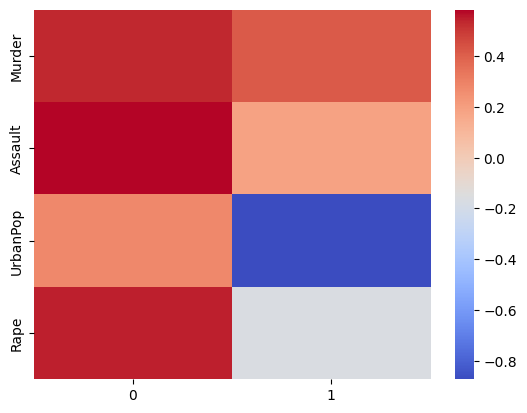

In [54]:
#Generate the heatmap shows the coorelations between the two PCs vs the origianal data features
components = pd.DataFrame(pca.components_, columns=data.columns).transpose()
ax = sns.heatmap(components,cmap='coolwarm')

In [74]:

city=data.index
labels =data.columns
def biplot(score,coeff,labels=None,points=None):
   
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = city[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC0")
    plt.ylabel("PC1")
    plt.grid()

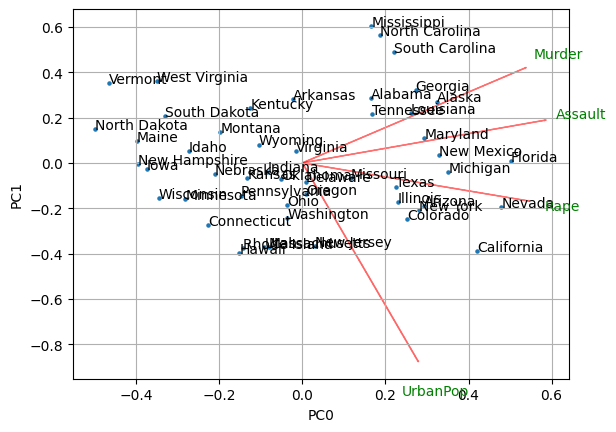

In [75]:
#Generate the bitplot to show the importance of each features to the two PCs
#From the graph below, we can see Murder, Assault and rape are more important to PC0
#And  UrbanPop is more important to PC1
biplot(principal_components,np.transpose(pca.components_),list(labels),list(city))
plt.show()

In [78]:
# From the table below, it matches the importance we illustrated from the graph above
pc0 = abs( pca.components_[0] )
pc1 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC0 Importance"] = pc0
feat_df["PC1 Importance"] = pc1
feat_df

,Features,PC0 Importance,PC1 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


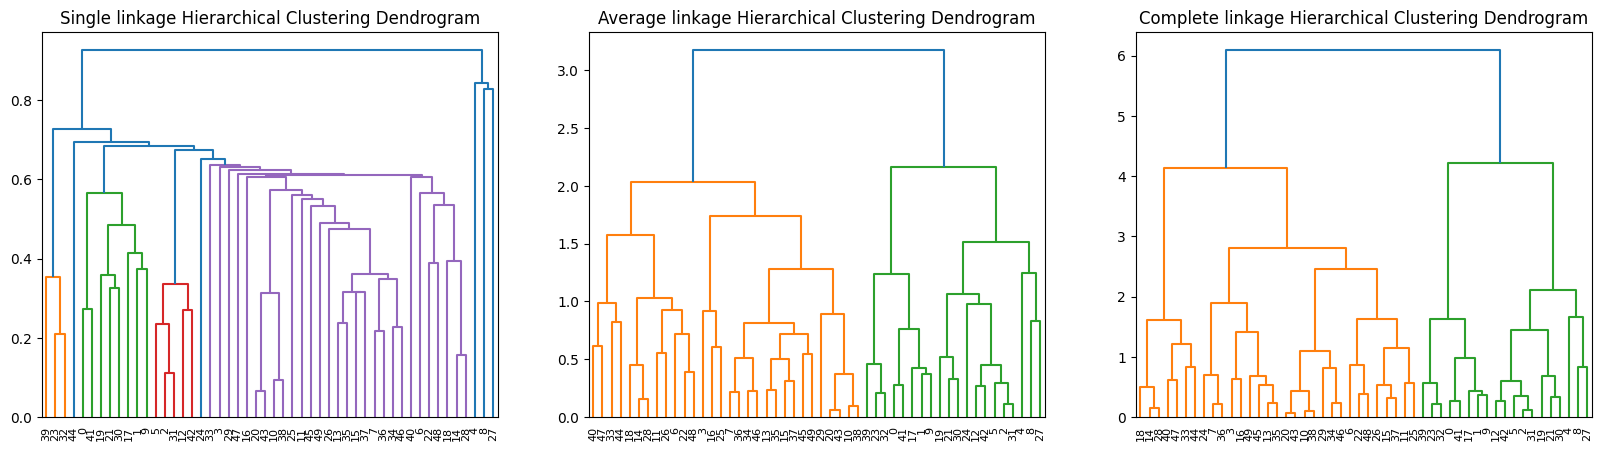

In [65]:
#To Plot the Hierarchical Clustering Dendrograms for single, average and complete linkage
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("Single linkage Hierarchical Clustering Dendrogram")  
dend = dendrogram(linkage(pca_df, method='single'))

plt.subplot(1,3,2)
plt.title("Average linkage Hierarchical Clustering Dendrogram")  
dend = dendrogram(linkage(pca_df, method='average'))

plt.subplot(1,3,3)
plt.title("Complete linkage Hierarchical Clustering Dendrogram")  
dend = dendrogram(linkage(pca_df, method='complete'))

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [110.0, 110.0, 133.75, 133.75],
  [82.5, 82.5, 121.875, 121.875],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [180.0, 180.0, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [242.5, 242.5, 286.25, 286.25],
  [196.25, 196.25, 264.375, 264.375],
  [102.1875, 102.1875, 230.3125, 230.3125],
  [31.25, 31.25, 166.25, 166.25],
  [325.0, 325.0, 335.0, 335.0],
  [315

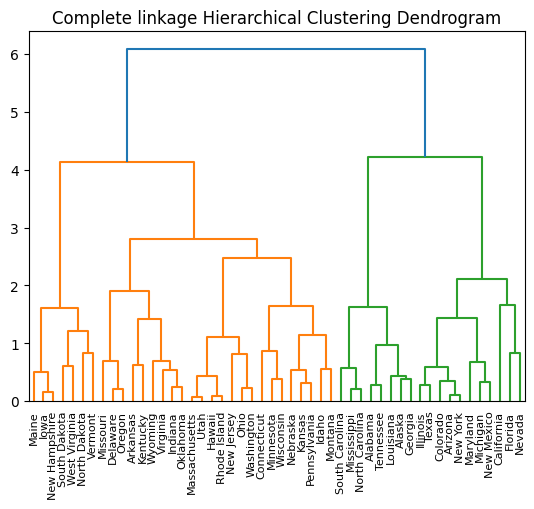

In [68]:
#Complete is the linkage with the most obvious dissimilarities 
plt.title("Complete linkage Hierarchical Clustering Dendrogram")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)

c:\Users\wongh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\wongh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The silhouette score is 0.44


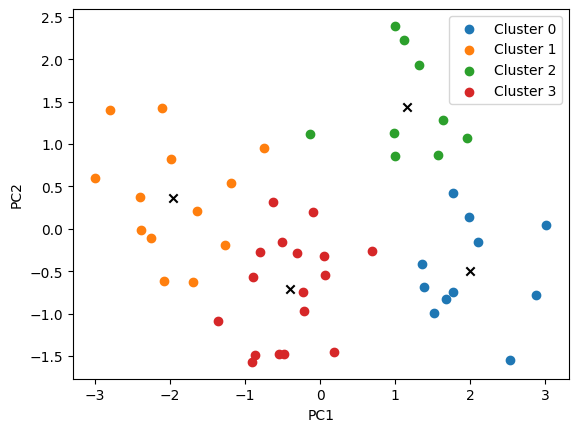

In [73]:
#make the scatterplot by using K-mean cclustering
#From the above dendrograms, there are 4 most obvious and dissimilar clusters, so I use 4 for k
X = pca_df.values.reshape(-1,2)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X) 
y_pred = kmeans.fit_predict(X)
for c in range(4):
    plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], label = 'Cluster {}'.format(c))
    plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
print(f'The silhouette score is {score}')